Training Accuracy: 99.16666666666667
Misclassification Error on training dataset: 1

Testing Accuracy: 96.66666666666667
Misclassification Error on testing dataset: 1


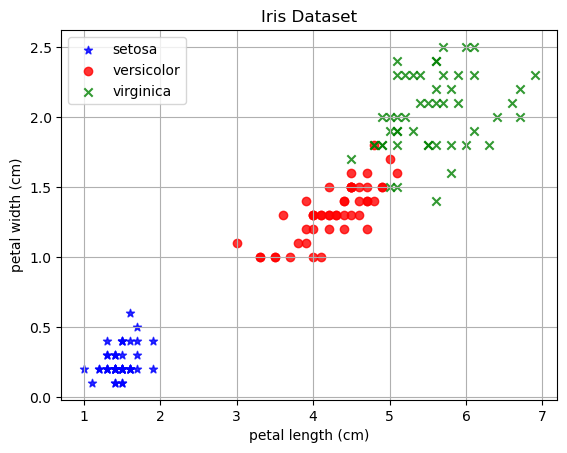

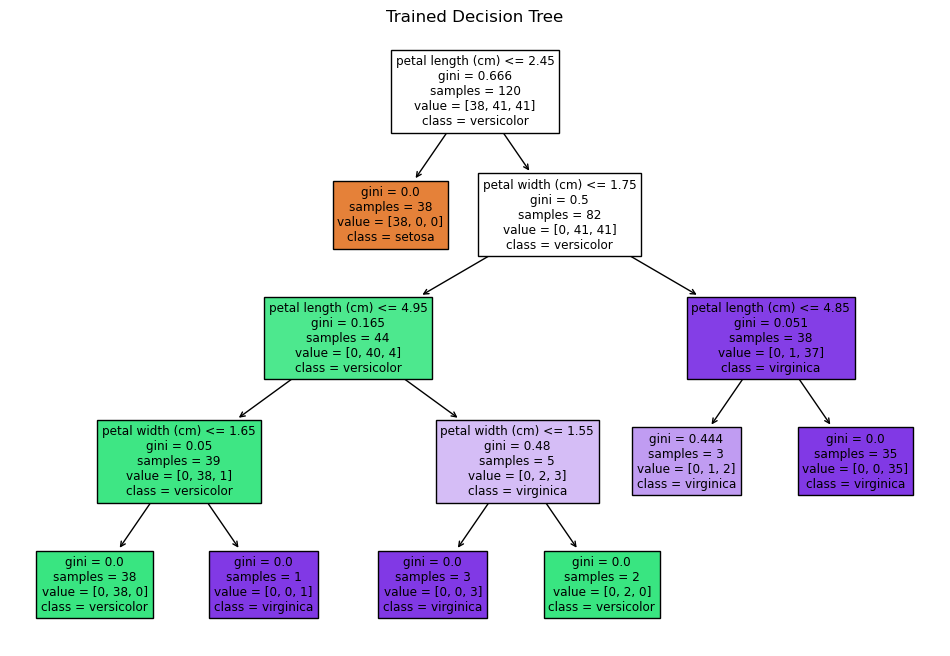

In [7]:
from math import ceil
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris(as_frame=False)

X = iris.data[:, 2:4]  # we only take the first two features.
y = iris.target
feature_names = list(iris.feature_names[2:4])  # Convert to list
class_names = list(iris.target_names)  # Convert to list

plt.xlabel(f"{feature_names[0]}")
plt.ylabel(f"{feature_names[1]}")
plt.title("Iris Dataset")
colors = ["blue", "red", "green"]
markers = ["*", "o", "x"]
for marker, color, i, target_name in zip(markers, colors, [0, 1, 2], class_names):
    plt.scatter(
        X[y == i, 0], X[y == i, 1], color=color, alpha=0.8, label=target_name, marker=marker
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.grid()


#splitting the dataset 80-20 rule
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#importing decison tree classification model
DecisionTree=DecisionTreeClassifier()

#training phase
DecisionTree.fit(X_train,y_train)

# Display the results of training and testing
accuracy_score_train=DecisionTree.score(X_train, y_train)
print("Training Accuracy:", accuracy_score_train*100)
misclassification_error = ceil((1-accuracy_score_train)*len(y_test))
print("Misclassification Error on training dataset:", misclassification_error)

print()
accuracy_score_test=DecisionTree.score(X_test, y_test)
print("Testing Accuracy:",DecisionTree.score(X_test, y_test) *100)
misclassification_error = ceil((1 - accuracy_score_test)*len(y_test))
print("Misclassification Error on testing dataset:", misclassification_error)

# Display the trained tree
plt.figure(figsize=(12, 8))
plot_tree(DecisionTree, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Trained Decision Tree")
plt.show()